In [2]:
import pandas as pd
df = pd.read_csv("OptionData.csv")

In [3]:
df

,Symbol,Date,Expiry,Option Type,Strike Price,Open,High,Low,Close,LTP,Settle Price,No. of contracts,Turnover in Lacs,Premium Turnover in Lacs,Open Int,Change in OI,Underlying Value
0,SBIN,3-Apr-18,26-Apr-18,CE,240,15.05,17.50,14.30,15.75,15.95,15.75,169,1298.32,81.52,648000,-66000,250.5
1,SBIN,3-Apr-18,26-Apr-18,CE,245,12.20,13.60,11.25,12.25,12.55,12.25,56,431.99,20.39,102000,-24000,250.5
2,SBIN,3-Apr-18,26-Apr-18,CE,250,8.75,10.95,8.50,9.55,9.60,9.55,2341,18234.34,676.84,1851000,-72000,250.5
3,SBIN,3-Apr-18,26-Apr-18,CE,255,6.40,8.40,6.30,7.15,7.35,7.15,1029,8099.52,227.67,684000,354000,250.5
4,SBIN,3-Apr-18,26-Apr-18,CE,260,4.95,6.35,4.70,5.30,5.35,5.30,2404,19147.89,396.69,2730000,267000,250.5
5,SBIN,3-Apr-18,26-Apr-18,CE,265,3.95,4.75,3.45,3.85,3.90,3.85,345,2784.02,41.27,393000,216000,250.5
6,SBIN,3-Apr-18,26-Apr-18,CE,270,2.65,3.45,2.50,2.85,2.85,2.85,1637,13405.34,145.64,2724000,447000,250.5
7,SBIN,3-Apr-18,26-Apr-18,CE,275,2.30,2.55,1.90,2.05,2.20,2.05,164,1363.56,10.56,186000,72000,250.5
8,SBIN,3-Apr-18,26-Apr-18,CE,280,1.35,1.95,1.20,1.55,1.55,1.55,1123,9487.74,54.54,2052000,201000,250.5
9,SBIN,3-Apr-18,26-Apr-18,CE,285,1.30,1.50,1.05,1.20,1.15,1.20,58,498.08,2.18,207000,18000,250.5


In [139]:
from mibian import BS
listVol = []
a = BS([250.5, 240, 0.065, 23], callPrice = 15.95)
listVol.append(a.impliedVolatility)
a = BS([250.5, 245, 0.065, 23], callPrice = 12.55)
listVol.append(a.impliedVolatility)
a = BS([250.5, 250, 0.065, 23], callPrice = 9.60)
listVol.append(a.impliedVolatility)
a = BS([250.5, 255, 0.065, 23], callPrice = 7.35)
listVol.append(a.impliedVolatility)
a = BS([250.5, 260, 0.065, 23], callPrice = 5.35)
listVol.append(a.impliedVolatility)
a = BS([250.5, 265, 0.065, 23], callPrice = 3.90)
listVol.append(a.impliedVolatility)
a = BS([250.5, 270, 0.065, 23], callPrice = 2.85)
listVol.append(a.impliedVolatility)
a = BS([250.5, 275, 0.065, 23], callPrice = 2.20)
listVol.append(a.impliedVolatility)
a = BS([250.5, 280, 0.065, 23], callPrice = 1.55)
listVol.append(a.impliedVolatility)
a = BS([250.5, 285, 0.065, 23], callPrice = 1.15)
listVol.append(a.impliedVolatility)
a = BS([250.5, 290, 0.065, 23], callPrice = 0.85)
listVol.append(a.impliedVolatility)
print(listVol)

[39.97802734375, 38.482666015625, 37.109375, 37.261962890625, 36.56005859375, 36.62109375, 36.92626953125, 38.0859375, 38.26904296875, 39.0625, 39.794921875]


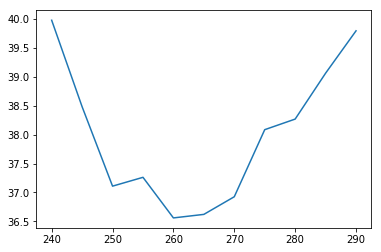

In [19]:
import matplotlib.pyplot as plt
listStrikes = [240, 245, 250, 255, 260, 265, 270, 275, 280, 285, 290]
plt.plot(listStrikes, listVol)

In [36]:
### Calculation of Implied Volatility using Newton - Raphson Method ###

### I will be calculating for Call Option but there is no difference in calculating for Put Option ###

import math
from scipy.stats import norm



def d1(S, K, sigma, r, T, q):
    
    d1 = (math.log(S/K) + (r - q + 0.5*(sigma)**2)*T)/(sigma*(math.sqrt(T)))
    
    return d1

def d2(S, K, sigma, r, T, q):
    
    d2 = d1(S, K, sigma, r, T, q) - sigma*(math.sqrt(T))
    
    return d2


def CallOption(S, K, sigma, r, T, q):
    
    ## S is the Asset Price ##
    ## K is the Strike Price ##
    ## sigma is the Volatility ##
    ## r is the Interest Rate (Continuously Compounded) ##
    ## T is the Time to Maturity as a percentage of 365 days ##
    ## q is the Dividend Rate ##
    
    a = d1(S, K, sigma, r, T, q)
    b = d2(S, K, sigma, r, T, q)
    
    Call = S*(math.exp(-(q*T)))*(norm.cdf(a)) - K*(math.exp(-(r*T)))*norm.cdf(b)
    
    return Call

def fsigma(S, K, sigma, r, T, q, OptionValue):
    c = CallOption(S, K, sigma, r, T, q)
    
    f = c - OptionValue
    
    return f

def Nddash(x):
    
    a = (1/math.sqrt(2*math.pi))*math.exp(-(x**2)/2)
    
    return a


def fdersigma(S, K, sigma, r, T, q, OptionValue):
    
    d1dash = (-(math.log(S/K))/((sigma**2)*math.sqrt(T))) - (((r - q)*(math.sqrt(T)))/(sigma**2)) + ((0.5)*math.sqrt(T))
    
    d2dash = d1dash - math.sqrt(T)
    
    fder = S*(Nddash(d1(S, K, sigma, r, T, q)))*d1dash - K*(math.exp(-r*T))*(Nddash(d2(S, K, sigma, r, T, q)))*d2dash
    
    return fder
    

def ImpliedVolatility(S, K, sigma, r, T, q, OptionValue):
    
    
    dsigma = 0.001
    Iter = 100
    Tol = 0.001
    i = 1
    
    ## sigma is the initial guess of the Implied Volatility ##
    
    while i <= Iter:
        
        a = sigma - (fsigma(S, K, sigma, r, T, q, OptionValue)/fdersigma(S, K, sigma, r, T, q, OptionValue))
        
        if abs(a - sigma) < Tol:
            
            return a      
        
        else:
              
            sigma = a
            i = i + 1
            
    return None

In [37]:
Listsig = []
Listpercha = []
ListObtainedValues = []
a = ImpliedVolatility(250.5, 240, 0.35, 0.065, 23/365, 0, 15.95)
Listsig.append(a)
c = CallOption(250.5, 240, a, 0.065, 23/365, 0)
ListObtainedValues.append(c)
b = ((c - 15.95)/15.95)*100
Listpercha.append(b)

a = ImpliedVolatility(250.5, 245, 0.35, 0.065, 23/365, 0, 12.55)
Listsig.append(a)
c = CallOption(250.5, 245, a, 0.065, 23/365, 0)
ListObtainedValues.append(c)
b = ((c - 12.55)/12.55)*100
Listpercha.append(b)

a = ImpliedVolatility(250.5, 250, 0.35, 0.065, 23/365, 0, 9.60)
Listsig.append(a)
c = CallOption(250.5, 250, a, 0.065, 23/365, 0)
ListObtainedValues.append(c)
b = ((c - 9.60)/9.60)*100
Listpercha.append(b)

a = ImpliedVolatility(250.5, 255, 0.35, 0.065, 23/365, 0, 7.35)
Listsig.append(a)
c = CallOption(250.5, 255, a, 0.065, 23/365, 0)
ListObtainedValues.append(c)
b = ((c - 7.35)/7.35)*100
Listpercha.append(b)

a = ImpliedVolatility(250.5, 260, 0.35, 0.065, 23/365, 0, 5.35)
Listsig.append(a)
c = CallOption(250.5, 260, a, 0.065, 23/365, 0)
ListObtainedValues.append(c)
b = ((c - 5.35)/5.35)*100
Listpercha.append(b)

a = ImpliedVolatility(250.5, 265, 0.35, 0.065, 23/365, 0, 3.90)
Listsig.append(a)
c = CallOption(250.5, 265, a, 0.065, 23/365, 0)
ListObtainedValues.append(c)
b = ((c - 3.90)/3.90)*100
Listpercha.append(b)

a = ImpliedVolatility(250.5, 270, 0.35, 0.065, 23/365, 0, 2.85)
Listsig.append(a)
c = CallOption(250.5, 270, a, 0.065, 23/365, 0)
ListObtainedValues.append(c)
b = ((c - 2.85)/2.85)*100
Listpercha.append(b)

a = ImpliedVolatility(250.5, 275, 0.35, 0.065, 23/365, 0, 2.20)
Listsig.append(a)
c = CallOption(250.5, 275, a, 0.065, 23/365, 0)
ListObtainedValues.append(c)
b = ((c - 2.20)/2.20)*100
Listpercha.append(b)

a = ImpliedVolatility(250.5, 280, 0.35, 0.065, 23/365, 0, 1.55)
Listsig.append(a)
c = CallOption(250.5, 280, a, 0.065, 23/365, 0)
ListObtainedValues.append(c)
b = ((c - 1.55)/1.55)*100
Listpercha.append(b)

a = ImpliedVolatility(250.5, 285, 0.35, 0.065, 23/365, 0, 1.15)
Listsig.append(a)
c = CallOption(250.5, 285, a, 0.065, 23/365, 0)
ListObtainedValues.append(c)
b = ((c - 1.15)/1.15)*100
Listpercha.append(b)

a = ImpliedVolatility(250.5, 290, 0.35, 0.065, 23/365, 0, 0.85)
Listsig.append(a)
c = CallOption(250.5, 290, a, 0.065, 23/365, 0)
ListObtainedValues.append(c)
b = ((c - 0.85)/0.85)*100
Listpercha.append(b)


In [53]:
print("Implied Volatilities are:")
print(Listsig)
print("------")
print("Black Scholes formula for the Implied Volatility are:")
print(ListObtainedValues)
print("------")
print("Percentage change in Option Price Implied VS Market are:")
print(Listpercha)

Implied Volatilities are:
[0.3705572804911422, 0.3605956704407894, 0.35270166290758276, 0.35535890986929153, 0.3507128809780558, 0.35247193026201223, 0.3575340693385475, 0.3710732214028003, 0.3729691483279904, 0.3814640908058709, 0.3893565439088678]
------
Black Scholes formula for the Implied Volatility are:
[15.950000192924307, 12.550000000503985, 9.600000000000023, 7.35000000000062, 5.3500024114001405, 3.9000000000981174, 2.8500000441850943, 2.2000080167329514, 1.5500000001012353, 1.150000007141081, 0.85000018227149]
------
Percentage change in Option Price Implied VS Market are:
[1.2095567877140838e-06, 4.0158120299678104e-09, 2.405483220021173e-13, 8.434673972118198e-12, 4.5072899829913175e-05, 2.5158336952175047e-09, 1.550354184213407e-06, 0.0003643969523297647, 6.531305962015165e-09, 6.209635704185925e-07, 2.1443704707338312e-05]


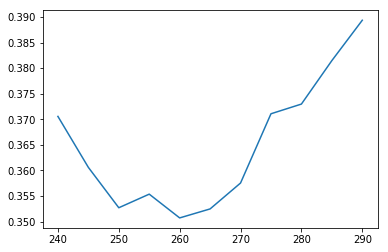

In [39]:
import matplotlib.pyplot as plt
listStrikes = [240, 245, 250, 255, 260, 265, 270, 275, 280, 285, 290]
plt.plot(listStrikes, Listsig)

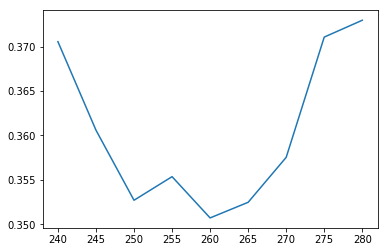

In [40]:
## Dropping the last two values for the smile to appear better ##
list1 = [240, 245, 250, 255, 260, 265, 270, 275, 280]
list2 = Listsig[:9]
plt.plot(list1, list2)

In [130]:
### Bisection Method to find Implied Volatility ###

def ImpliedVolatility1(S, K, r, T, q, OptionValue, a, b):
    
    Iter = 100
    Tol = 0.0001
    i = 1
    k = (a + b)/2
    ## sigma is the initial guess of the Implied Volatility ##
    
    while i <= Iter:
        if fsigma(S, K, k, r, T, q, OptionValue) == 0 or abs(a - b) < Tol or i == Iter:
            
            return k
        
        i = i + 1
        if fsigma(S, K, k, r, T, q, OptionValue) > 0:
            
            b = k
            
        elif fsigma(S, K, k, r, T, q, OptionValue) < 0:
            a = k 
    ## Don't forget to take the midpoint again ##
        k = (a + b)/2  
    return k        
       

In [120]:
Listsig1 = []
Listpercha1 = []
ListObtainedValues1 = []
a = ImpliedVolatility1(250.5, 240, 0.065, 23/365, 0, 15.95, 0.33, 0.40)
Listsig1.append(a)
c = CallOption(250.5, 240, a, 0.065, 23/365, 0)
ListObtainedValues1.append(c)
b = ((c - 15.95)/15.95)*100
Listpercha1.append(b)

a = ImpliedVolatility1(250.5, 245, 0.065, 23/365, 0, 12.55, 0.33, 0.40)
Listsig1.append(a)
c = CallOption(250.5, 245, a, 0.065, 23/365, 0)
ListObtainedValues1.append(c)
b = ((c - 12.55)/12.55)*100
Listpercha1.append(b)

a = ImpliedVolatility1(250.5, 250, 0.065, 23/365, 0, 9.60, 0.33, 0.40)
Listsig1.append(a)
c = CallOption(250.5, 250, a, 0.065, 23/365, 0)
ListObtainedValues1.append(c)
b = ((c - 9.60)/9.60)*100
Listpercha1.append(b)

a = ImpliedVolatility1(250.5, 255, 0.065, 23/365, 0, 7.35, 0.33, 0.40)
Listsig1.append(a)
c = CallOption(250.5, 255, a, 0.065, 23/365, 0)
ListObtainedValues1.append(c)
b = ((c - 7.35)/7.35)*100
Listpercha1.append(b)

a = ImpliedVolatility1(250.5, 260, 0.065, 23/365, 0, 5.35, 0.33, 0.40)
Listsig1.append(a)
c = CallOption(250.5, 260, a, 0.065, 23/365, 0)
ListObtainedValues1.append(c)
b = ((c - 5.35)/5.35)*100
Listpercha1.append(b)

a = ImpliedVolatility1(250.5, 265, 0.065, 23/365, 0, 3.90, 0.33, 0.40)
Listsig1.append(a)
c = CallOption(250.5, 265, a, 0.065, 23/365, 0)
ListObtainedValues1.append(c)
b = ((c - 3.90)/3.90)*100
Listpercha1.append(b)

a = ImpliedVolatility1(250.5, 270, 0.065, 23/365, 0, 2.85, 0.33, 0.40)
Listsig1.append(a)
c = CallOption(250.5, 270, a, 0.065, 23/365, 0)
ListObtainedValues1.append(c)
b = ((c - 2.85)/2.85)*100
Listpercha1.append(b)

a = ImpliedVolatility1(250.5, 275, 0.065, 23/365, 0, 2.20, 0.33, 0.40)
Listsig1.append(a)
c = CallOption(250.5, 275, a, 0.065, 23/365, 0)
ListObtainedValues1.append(c)
b = ((c - 2.20)/2.20)*100
Listpercha1.append(b)

a = ImpliedVolatility1(250.5, 280, 0.065, 23/365, 0, 1.55, 0.33, 0.40)
Listsig1.append(a)
c = CallOption(250.5, 280, a, 0.065, 23/365, 0)
ListObtainedValues1.append(c)
b = ((c - 1.55)/1.55)*100
Listpercha1.append(b)

a = ImpliedVolatility1(250.5, 285, 0.065, 23/365, 0, 1.15, 0.33, 0.40)
Listsig1.append(a)
c = CallOption(250.5, 285, a, 0.065, 23/365, 0)
ListObtainedValues1.append(c)
b = ((c - 1.15)/1.15)*100
Listpercha1.append(b)

a = ImpliedVolatility1(250.5, 290, 0.065, 23/365, 0, 0.85, 0.33, 0.40)
Listsig1.append(a)
c = CallOption(250.5, 290, a, 0.065, 23/365, 0)
ListObtainedValues1.append(c)
b = ((c - 0.85)/0.85)*100
Listpercha1.append(b)


In [121]:
print("Implied Volatilities are:")
print(Listsig1)
print("------")
print("Black Scholes formula for the Implied Volatility are:")
print(ListObtainedValues1)
print("------")
print("Percentage change in Option Price Implied VS Market are:")
print(Listpercha1)

Implied Volatilities are:
[0.37057128906250003, 0.3605908203125, 0.35272949218750005, 0.3553271484375, 0.3506787109375, 0.3524560546875001, 0.3575146484374999, 0.37104980468750004, 0.37296386718749996, 0.3814404296875, 0.3893701171874999]
------
Black Scholes formula for the Implied Volatility are:
[15.950302142537595, 12.54988499812842, 9.600693680953484, 7.34920795219638, 5.349191253511677, 3.8996567919482743, 2.8496308435410427, 2.199620177995712, 1.5499275398202954, 1.1497305798087432, 0.8501266738064679]
------
Percentage change in Option Price Implied VS Market are:
[0.0018943105805362312, -0.0009163495743521878, 0.007225843265457055, -0.010776160593461377, -0.015116756791081374, -0.008800206454502756, -0.012952858209031902, -0.01726463655856007, -0.004674850303524933, -0.023427842717978514, 0.014902800760931064]


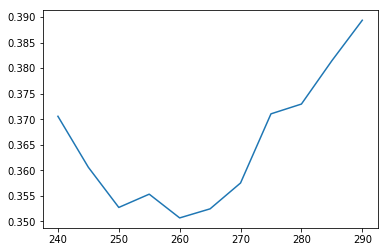

In [122]:
listStrikes = [240, 245, 250, 255, 260, 265, 270, 275, 280, 285, 290]
plt.plot(listStrikes, Listsig1)

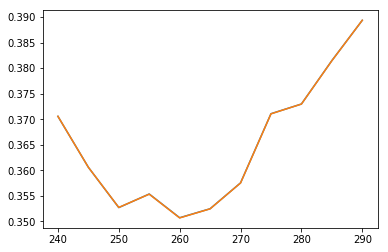

In [125]:
## Implied Volatility Smiles of both Newton - Raphson and Bisection method ##
## Even though the graphs seem like if you see the percentage error Newton - Raphson is a better approximation ##
plt.plot(listStrikes, Listsig)
plt.plot(listStrikes, Listsig1)
plt.show()

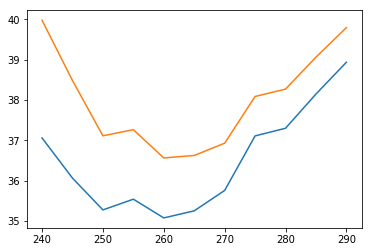

In [129]:
## Implied Volatility Smiles of both Newton - Raphson and Mibian package pricer ##
listtemp = [100*x for x in Listsig]
plt.plot(listStrikes, listtemp)
plt.plot(listStrikes, listVol)
plt.show()

In [136]:
## The shapes seem similar but which one has the lowest error ##
## As you can see the values are different than the ones in the data provided above ##
## So, I am thinking that Newton - Raphson is one of the best approximation ##
listk = []
listabc = [i/100 for i in listVol]
for i in range(0, len(listVol)):
    a = CallOption(250.5, 240 + 5*i, listabc[i], 0.065, 23/365, 0)
    listk.append(a)
print(listk)    

[16.585724455853267, 13.12603492289972, 10.058476602488568, 7.780652408140739, 5.704427970377665, 4.198955017148052, 3.0751853450822253, 2.3640161595560443, 1.6856260797843206, 1.2564271976867083, 0.9319328336289132]
